In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import gurobipy as gb
import pandas as pd

In [2]:
n = 60 #number of seats

In [3]:
C = [(i,j) for i in range(n) for j in range(n)]

In [4]:
mdl = gb.Model("covid_nonlinear")

Using license file C:\Users\aakgul\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-19


In [5]:
#hall is a rectangular shape with 30 m length and 20 m width
x = mdl.addVars(n, lb =1, ub = 30, name = "xc")#continuous variable for x coordinate
y = mdl.addVars(n, lb =1, ub = 20, name = "yc")#continuous variable for y coordinate
dmin = mdl.addVar(lb = 5, name = "dmin")#minimum distance amount all seats distance from the each others. minimum distance must be greater or equal than square root(5)

In [6]:
mdl.setObjective(dmin,gb.GRB.MAXIMIZE)#maxmin

In [7]:
mdl.addConstrs(((x[i]-x[j])**2+(y[i]-y[j])**2) >=dmin for i,j in C if j > i)#I dont use square root since it is nonsmooth. dmin is distance square between two points in this problem

{(0, 1): <gurobi.QConstr Not Yet Added>,
 (0, 2): <gurobi.QConstr Not Yet Added>,
 (0, 3): <gurobi.QConstr Not Yet Added>,
 (0, 4): <gurobi.QConstr Not Yet Added>,
 (0, 5): <gurobi.QConstr Not Yet Added>,
 (0, 6): <gurobi.QConstr Not Yet Added>,
 (0, 7): <gurobi.QConstr Not Yet Added>,
 (0, 8): <gurobi.QConstr Not Yet Added>,
 (0, 9): <gurobi.QConstr Not Yet Added>,
 (0, 10): <gurobi.QConstr Not Yet Added>,
 (0, 11): <gurobi.QConstr Not Yet Added>,
 (0, 12): <gurobi.QConstr Not Yet Added>,
 (0, 13): <gurobi.QConstr Not Yet Added>,
 (0, 14): <gurobi.QConstr Not Yet Added>,
 (0, 15): <gurobi.QConstr Not Yet Added>,
 (0, 16): <gurobi.QConstr Not Yet Added>,
 (0, 17): <gurobi.QConstr Not Yet Added>,
 (0, 18): <gurobi.QConstr Not Yet Added>,
 (0, 19): <gurobi.QConstr Not Yet Added>,
 (0, 20): <gurobi.QConstr Not Yet Added>,
 (0, 21): <gurobi.QConstr Not Yet Added>,
 (0, 22): <gurobi.QConstr Not Yet Added>,
 (0, 23): <gurobi.QConstr Not Yet Added>,
 (0, 24): <gurobi.QConstr Not Yet Added>,
 

In [9]:
mdl.params.NonConvex = 2
mdl.params.TimeLimit = 1800
#mdl.params.MIPFocus = 1
mdl.params.Method = 0
mdl.params.PreSolve = 0
mdl.params.Heuristics = 0.7
mdl.optimize()

Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter TimeLimit to 1800.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Changed value of parameter Method to 0
   Prev: -1  Min: -1  Max: 5  Default: -1
Changed value of parameter PreSolve to 0
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter Heuristics to 0.7
   Prev: 0.05  Min: 0.0  Max: 1.0  Default: 0.05
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 0 rows, 121 columns and 0 nonzeros
Model fingerprint: 0x03ab0ecc
Model has 1770 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 3e+01]
  RHS range        [0e+00, 0e+00]

Continuous model is non-convex -- solving as a MIP.


User MIP start did not pro

  6251  5068  263.87454   89 1942    5.68827  634.04564      -   772  688s
  6344  5073  224.81949   91 2011    5.68827  634.04564      -   773  692s
  6434  5079  158.40321   92 1402    5.68827  634.04564      -   776  696s
  6516  5086  158.40321   95 1384    5.68827  634.04564      -   776  701s
  6550  5140  118.74154  104  563    5.68827  634.04564      -   782  705s
  6615  5172   80.89597  126  588    5.68827  634.04564      -   788  710s
  6669  5236   46.56426  143  345    5.68827  634.04564      -   792  715s
  6803  5303   33.18641  181  376    5.68827  634.04564      -   797  724s
  6863  5350   32.96420  190  512    5.68827  634.04564      -   802  728s
  6930  5430   17.75945  206  274    5.68827  634.04564      -   807  733s
  7032  5449   17.36260  242  469    5.68827  634.04564      -   809  738s
  7085  5485   16.60740  259  350    5.68827  634.04564      -   817  743s
  7139  5566    9.81621  269  297    5.68827  634.04564      -   826  749s
  7238  5684    9.43020  

In [10]:
mdl.printAttr('X')#dmin is 7.257. this is actally minimum distance square. 7.257**0.5 = 2.693. This value is minimum distance


    Variable            X 
-------------------------
       xc[0]      27.6903 
       xc[1]      26.5552 
       xc[2]      28.6015 
       xc[3]      26.6843 
       xc[4]      3.40662 
       xc[5]      27.1724 
       xc[6]       7.6535 
       xc[7]      19.8533 
       xc[8]            1 
       xc[9]      11.0026 
      xc[10]       23.865 
      xc[11]      21.8281 
      xc[12]      10.7394 
      xc[13]      18.7143 
      xc[14]      17.0126 
      xc[15]      12.9984 
      xc[16]      13.0528 
      xc[17]      24.4442 
      xc[18]      7.34562 
      xc[19]            1 
      xc[20]      26.2806 
      xc[21]      15.0091 
      xc[22]           30 
      xc[23]           30 
      xc[24]      13.2598 
      xc[25]      10.3991 
      xc[26]      21.1728 
      xc[27]      5.13571 
      xc[28]      8.03641 
      xc[29]      28.7757 
      xc[30]      23.0933 
      xc[31]      25.7801 
      xc[32]      10.9592 
      xc[33]      17.8223 
      xc[34]      19.2253 
 

In [11]:
#all codes as below are fro visuliation. Red point are minimum distance
xc = [x.x for x in x.values()]
yc = [y.x for y in y.values()]

In [20]:
minliste= []
for i in range(n):
    for j in range(n):
        if j > i :
            if (xc[i]-xc[j])**2+(yc[i]-yc[j])**2 >= dmin.x-10**-6 and (xc[i]-xc[j])**2+(yc[i]-yc[j])**2 <=dmin.x+10**-6:#Due to constrain tolarance U made a very tiny change for dmin calculation
                minliste.append((i,j)) 

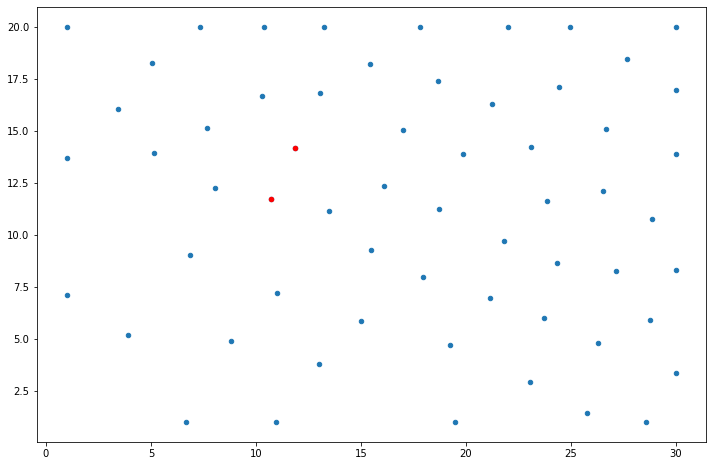

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(xc,yc,s = 20)
plt.scatter(xc[minliste[0][0]],yc[minliste[0][0]],c= "r",s = 20)
plt.scatter(xc[minliste[0][1]],yc[minliste[0][1]],c= "r",s = 20)